# Plot RPA data

## Preparation

Load some libraries

In [1]:
import tomllib
import pandas as pd
from pathlib import Path
from pprint import pprint

from multipac_testbench.instruments import RPACurrent, RPAPotential, RPA
from multipac_testbench.multipactor_test import MultipactorTest

In [2]:
project = Path("../data/campaign_ERPA")
config_path = Path(project, "testbench_configuration.toml")

with open(config_path, "rb") as f:
    config = tomllib.load(f)

results_path = Path(project, "MVE5-120MHz-50Ohm-BDTcomp-ERPA1_1dBm.csv")

## Load data

In [3]:
multipactor_test = MultipactorTest(results_path, config, freq_mhz=120.0, swr=1.0, sep=",", info="1dBm (175W)")

ERROR:root:Your Sample index column does not start at 0. I should patch this, but meanwhile expect some index mismatches.


## Comments

In [4]:
rpa_potential = multipactor_test.get_instrument(RPAPotential)
rpa_potential_data = rpa_potential.data_as_pd.copy()
rpa_potential_data.name = "RPA potential [V]"

rpa_current = multipactor_test.get_instrument(RPACurrent)
rpa_current_data = rpa_current.data_as_pd.copy()
rpa_current_data.name = "Averaged RPA current [uA]"


resume_rpa = pd.concat([rpa_potential_data, rpa_current_data], axis=1)
display(resume_rpa[40:50])

,RPA potential [V],Averaged RPA current [uA]
Sample index,,
41,5.0,6.518785
42,5.0,NaN
43,10.0,6.500730
44,10.0,NaN
45,15.0,6.513861
46,15.0,NaN
47,20.0,6.297208
48,20.0,NaN
49,25.0,6.154414


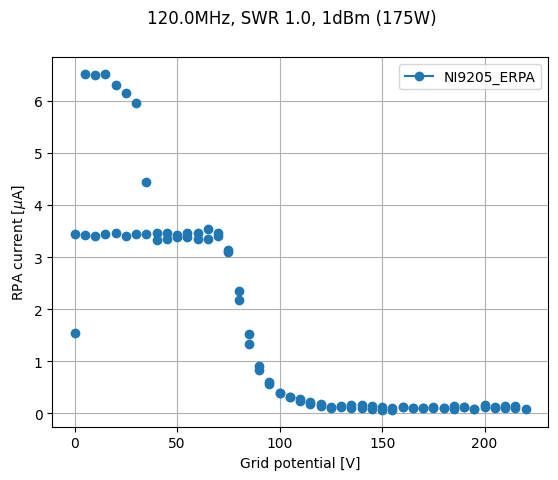

In [5]:
_, _ = multipactor_test.sweet_plot(
    RPACurrent,
    xdata=RPAPotential,
    marker="o",
)

Use the `drop_repeated_x` argument to force the display of lines anyway.

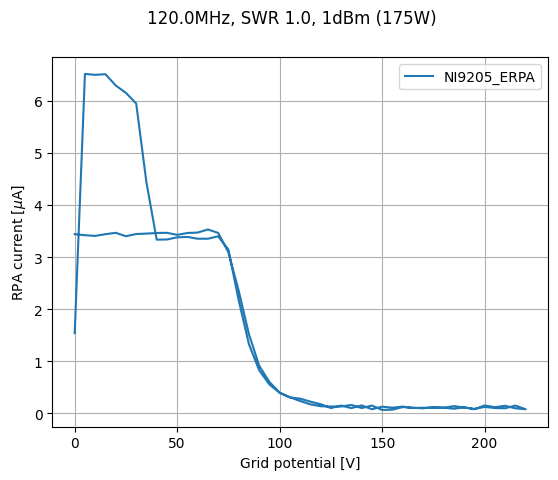

In [6]:
_, _ = multipactor_test.sweet_plot(
    RPACurrent,
    xdata=RPAPotential,
    drop_repeated_x=True,
)

## Show when potential was increased and when it was decreased

We start by calculating, for each measurement point, if potential was increased.

In [7]:
rpa_potential_growth_mask = rpa_potential.growth_mask(
    minimum_number_of_points=2, n_trailing_points_to_check=0
)

Now we set the `masks` dictionary. Remember that keys should start with double underscore (`__`).

In [8]:
masks = {
    "__(potential grows)": rpa_potential_growth_mask,
    "__(potential decreases)": ~rpa_potential_growth_mask,
}

And we are ready to plot!

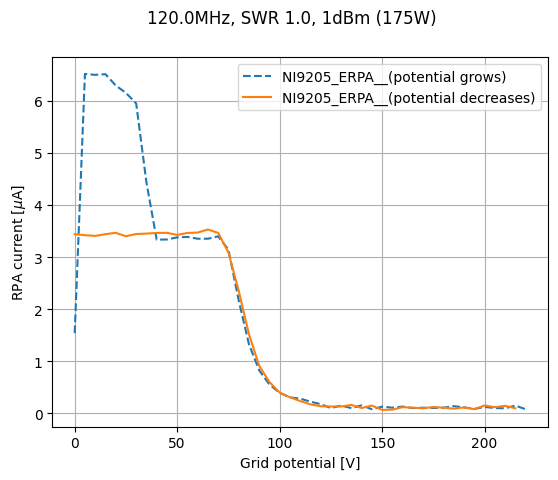

In [9]:
_, _ = multipactor_test.sweet_plot(
    RPACurrent,
    xdata=RPAPotential,
    drop_repeated_x=True,
    masks=masks,
)

## Plot energy distribution

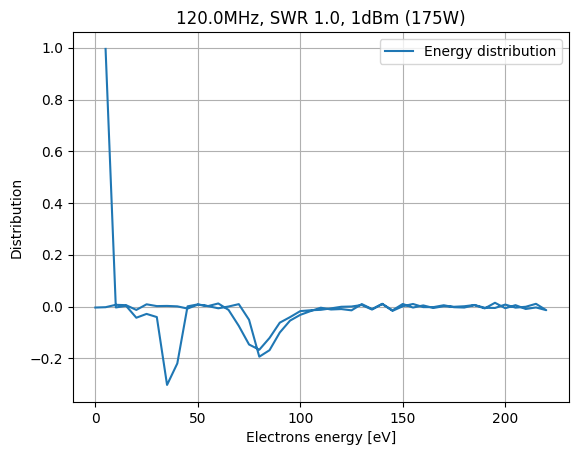

In [10]:
rpa = multipactor_test.get_instrument(RPA)
_ = rpa.data_as_pd.plot(x=0, y=1, grid=True, xlabel="Electrons energy [eV]", ylabel="Distribution", title=str(multipactor_test))